In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('data\cleaned_movie_dat_Dune1.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head(5))

   Movie_ID                                             Review Sentiment  Rate
0         0   dune is a great book and it along with its se...  Positive     7
1         2   having read the book a hundred years ago it t...  Positive     8
2         3   it is not a simple film but an adaptation of ...  Positive     6
3         6   its been amazing being back in cinemas after ...  Positive    10
4         7   i just reviewed the  movie  based on the same...  Positive     9


In [37]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jagakala\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
df['scores'] = df['Review'].apply(lambda Review: sid.polarity_scores(str(Review)))
df.head()

,Movie_ID,Review,Sentiment,Rate,scores,compound,SentimentType
0,0,dune is a great book and it along with its se...,Positive,7,"{'neg': 0.082, 'neu': 0.833, 'pos': 0.085, 'co...",0.7254,Positive
1,2,having read the book a hundred years ago it t...,Positive,8,"{'neg': 0.027, 'neu': 0.801, 'pos': 0.172, 'co...",0.9728,Positive
2,3,it is not a simple film but an adaptation of ...,Positive,6,"{'neg': 0.056, 'neu': 0.646, 'pos': 0.297, 'co...",0.9957,Positive
3,6,its been amazing being back in cinemas after ...,Positive,10,"{'neg': 0.043, 'neu': 0.763, 'pos': 0.194, 'co...",0.9774,Positive
4,7,i just reviewed the movie based on the same...,Positive,9,"{'neg': 0.041, 'neu': 0.774, 'pos': 0.185, 'co...",0.9975,Positive


In [42]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['SentimentType']=''
df.loc[df['compound'] > 0,'SentimentType'] = 'Positive'
df.loc[df['compound'] < 0,'SentimentType'] = 'Negative'
df.loc[df['compound'] == 0,'SentimentType'] = 'Neutral'
df.head()

,Movie_ID,Review,Sentiment,Rate,scores,compound,SentimentType
0,0,dune is a great book and it along with its se...,Positive,7,"{'neg': 0.082, 'neu': 0.833, 'pos': 0.085, 'co...",0.7254,Positive
1,2,having read the book a hundred years ago it t...,Positive,8,"{'neg': 0.027, 'neu': 0.801, 'pos': 0.172, 'co...",0.9728,Positive
2,3,it is not a simple film but an adaptation of ...,Positive,6,"{'neg': 0.056, 'neu': 0.646, 'pos': 0.297, 'co...",0.9957,Positive
3,6,its been amazing being back in cinemas after ...,Positive,10,"{'neg': 0.043, 'neu': 0.763, 'pos': 0.194, 'co...",0.9774,Positive
4,7,i just reviewed the movie based on the same...,Positive,9,"{'neg': 0.041, 'neu': 0.774, 'pos': 0.185, 'co...",0.9975,Positive


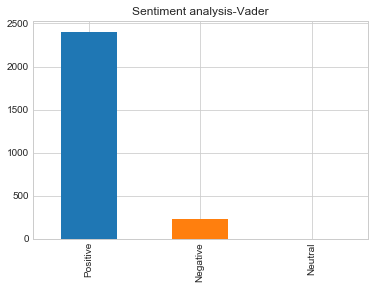

In [43]:
df.SentimentType.value_counts().plot(kind='bar',title="Sentiment analysis-Vader")

In [15]:
df.sentiment_type.value_counts()

    2636
Name: sentiment_type, dtype: int64

In [44]:
df = pd.read_csv('data\cleaned_movie_dat_Dune1.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
print(df.head(5))
#Textblob Analysis
from textblob import TextBlob
bloblist_desc = list()
df_review_str=df['Review'].astype(str)

   Movie_ID                                             Review Sentiment  Rate
0         0   dune is a great book and it along with its se...  Positive     7
1         2   having read the book a hundred years ago it t...  Positive     8
2         3   it is not a simple film but an adaptation of ...  Positive     6
3         6   its been amazing being back in cinemas after ...  Positive    10
4         7   i just reviewed the  movie  based on the same...  Positive     9


In [45]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [46]:
df_polarity_desc.head()

,Review,sentiment,polarity
0,dune is a great book and it along with its se...,0.043970,0.450813
1,having read the book a hundred years ago it t...,0.116452,0.555721
2,it is not a simple film but an adaptation of ...,0.194861,0.540575
3,its been amazing being back in cinemas after ...,0.288478,0.558986
4,i just reviewed the movie based on the same...,0.117374,0.558525


In [51]:
#TextBlob Sentimet Analysis
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

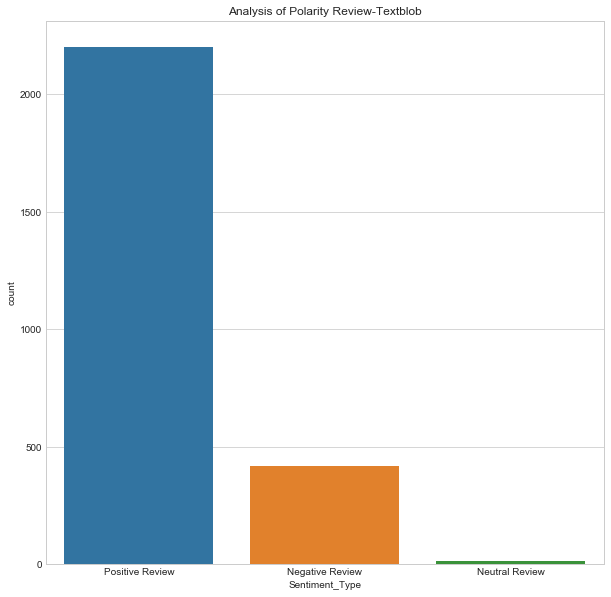

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc).set_title("Analysis of Polarity Review-Textblob")